In [180]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder, minmax_scale

#import machine learning
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC as svm

from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score, roc_auc_score #metrics

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding


In [7]:
# https://www.kaggle.com/kemical/kickstarter-projects

# Columns
# ID - internal kickstarter id
# name - name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
# category - category
# main_category - category of campaign
# currency - currency used to support
# deadline - deadline for crowdfunding
# goal - fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
# launched - date launched
# pledged - amount pledged by "crowd"
# state - Current condition the project is in
# backers - number of backers
# country - country pledged from
# usd pledged - amount of money pledged
# Goal amount in USD

In [6]:
df = pd.read_csv(r"C:\Users\User\Desktop\DevRepublik\_Final Project\kickstarter\ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
df.shape

(378661, 15)

# 1.Data Cleaning

# 1.1.Datatypes

launched,deadline -will fix as datetime types

In [8]:
df.deadline = pd.to_datetime(df.deadline, errors = 'coerce', format="%Y/%m/%d").dt.date
df.launched = pd.to_datetime(df.launched, errors = 'coerce', format="%Y/%m/%d").dt.date 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# 1.2.Null Data

In [10]:
df.isna().sum() 

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [11]:
df.drop('usd pledged', axis=1, inplace=True) #deleting our usd_pledged column
df.drop('pledged', axis=1, inplace=True) #deleting pledged
df.drop('goal', axis=1, inplace=True) #deleting goal

In [12]:
df = df.dropna() #dropping null values

# 1.3.Duplicates

In [13]:
df[df['ID'].duplicated() == True] #checking for duplicates in the ID column

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


In [14]:
df[df['name'].duplicated() == True] #checking for duplicates in name column

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
6379,1032645935,Cancelled (Canceled),Design,Design,USD,2015-06-05,2015-05-06,canceled,17,US,3105.00,100000.00
7743,1039093987,New EP/Music Development,Music,Music,USD,2016-01-07,2015-11-24,undefined,0,"N,0""",257.00,3800.00
8356,1042208764,The Basement,Horror,Film & Video,USD,2015-05-07,2015-04-07,successful,106,US,12311.00,12000.00
8448,1042642941,The Gift,Film & Video,Film & Video,USD,2013-05-08,2013-04-17,successful,37,US,3370.00,3000.00
8761,1044230780,Redemption,Narrative Film,Film & Video,USD,2012-08-25,2012-06-26,successful,67,US,11440.00,11000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
378140,997542782,Innocent Sin,Indie Rock,Music,USD,2015-01-25,2014-12-26,successful,15,US,600.00,300.00
378224,997919903,Grassroots,Publishing,Publishing,EUR,2017-09-14,2017-08-15,failed,3,IE,25.12,11963.01
378426,998836498,The InAction,Camera Equipment,Technology,USD,2016-07-29,2016-06-28,canceled,5,US,670.00,80000.00
378475,999055513,The Last Hurrah,Rock,Music,USD,2012-06-03,2012-05-04,successful,69,US,7665.00,5500.00


In [15]:
print (len(df[df['name'] == "Cancelled (Canceled)"])) #how many with with name
print (len(df[df['name'] == "New EP/Music Development"])) #and this
print (len(df[df['name'] == "MFA Thesis Exhibition"]))

10
41
4


some people do not use their fantasy in naming process

# 1.4. Misentered Data

In [16]:
df.country.value_counts() #check country column 

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

N,0"- what the hell is this?

In [17]:
df = df[df.country != 'N,0"'] #removing 

# 1.5.Normalization of Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A6307E608>,
      dtype=object)

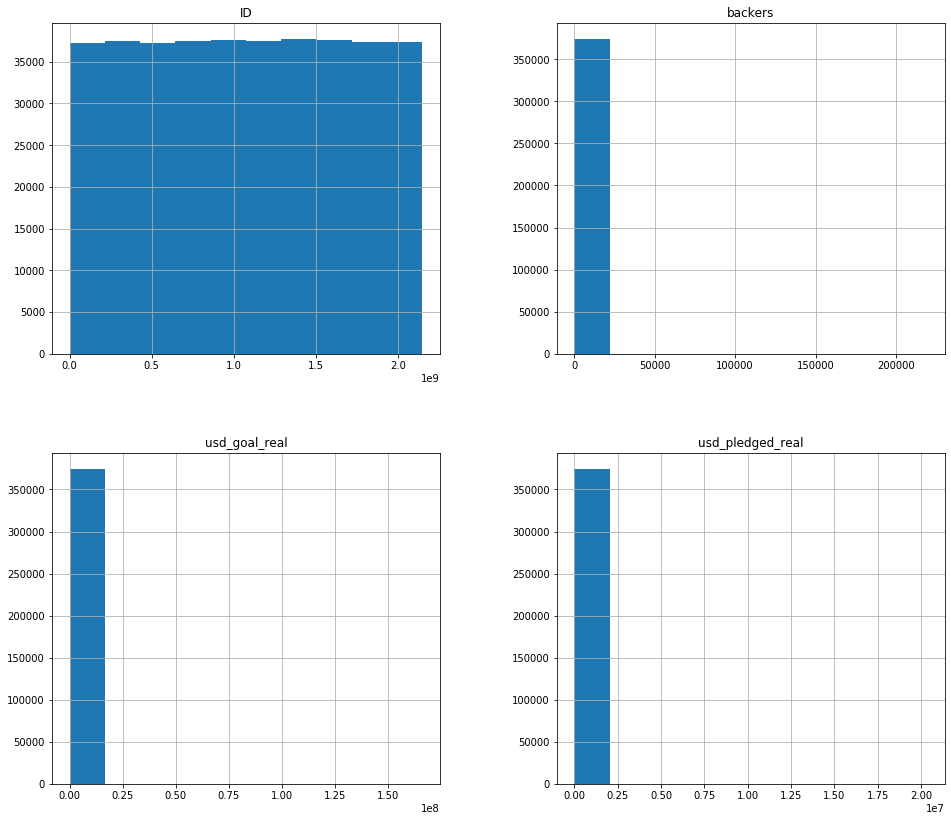

In [18]:
df.hist(figsize=(16,14)) #let's get a better idea of what we're working with here.

In [30]:
# there is no normal distribution
# last 3- all 0-heavy 

In [19]:
(df.backers == 0).sum() #how many projects have 0 backers

51811

15% of projects have no backers, and its a lot

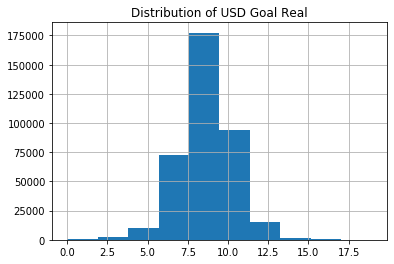

In [20]:
np.log(df.usd_goal_real + 1).hist() #hist of log transformed usd goal real
plt.title("Distribution of USD Goal Real")
plt.show()

The shape of USD goal looks a lot more normal when standardized.
lets transform numerical variables before to classification

In [21]:
df.backers.describe() #getting descriptive statistics

count    374860.000000
mean        106.688366
std         911.710124
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

In [22]:
df.backers.nlargest(10) # 10 largest values in our backers column

187652    219382
75900     154926
292244    105857
148585     91585
182657     87142
23404      85581
157270     78471
239175     74405
272924     73986
38291      73206
Name: backers, dtype: int64

* the most 3 successfull projects have more than 100.000 backers  
* it seems we could call them outliers

In [23]:
df.loc[187652] #project with highest number of backers

ID                         1955357092
name                Exploding Kittens
category               Tabletop Games
main_category                   Games
currency                          USD
deadline                   2015-02-20
launched                   2015-01-20
state                      successful
backers                        219382
country                            US
usd_pledged_real          8.78257e+06
usd_goal_real                   10000
Name: 187652, dtype: object

this project has a great success because the viral effect.

# 2.EDA

lets examine  categorical data

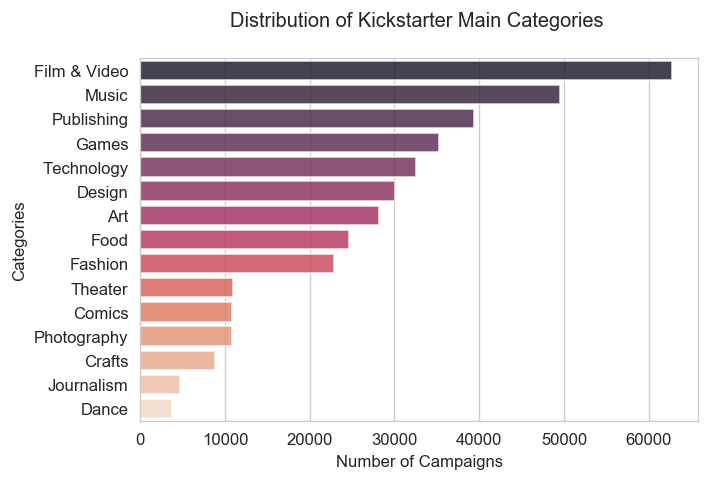

In [24]:
sns.set_style('whitegrid')
maincat = df.main_category.value_counts() 

fig = plt.figure(dpi=120) 
ax = fig.add_subplot(111)
ax = sns.barplot(y=maincat.index, x=maincat.values, palette="rocket", alpha=0.8)

plt.title('Distribution of Kickstarter Main Categories \n') 
ax.set(xlabel='Number of Campaigns', ylabel='Categories') 
plt.show()

In [25]:
len(df.category.unique()) #how many subcats are there

159

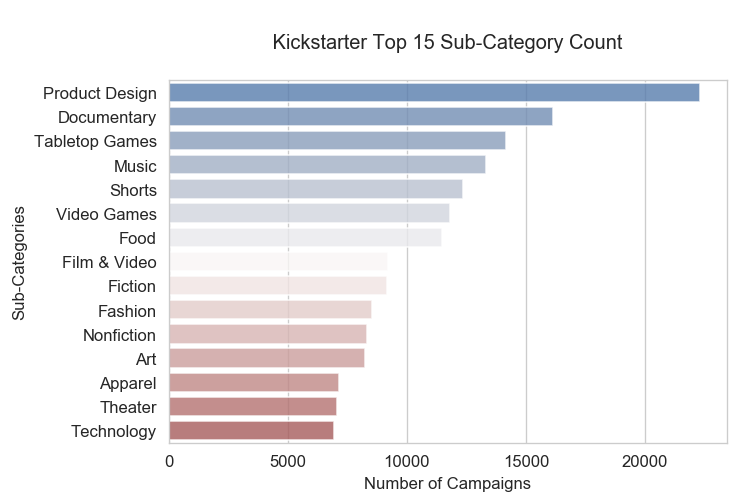

In [26]:
subcat = df.category.value_counts().head(15) 
fig = plt.figure(dpi=120) 
ax = fig.add_subplot(111) 
ax = sns.barplot(y=subcat.index, x=subcat.values, palette="vlag", alpha=0.8) 

plt.title('\n Kickstarter Top 15 Sub-Category Count \n')
ax.set(xlabel='Number of Campaigns', ylabel='Sub-Categories') 
plt.show()

* We have 15 main categories, and 159 total sub categories.
* In the main category film & video obviously dominate.
* But music still has a large edge on the other main categories. 
* Both graphs are imbalance, a lot of people have the same favorites.
* Music, food, film & video- appearing in both lists.

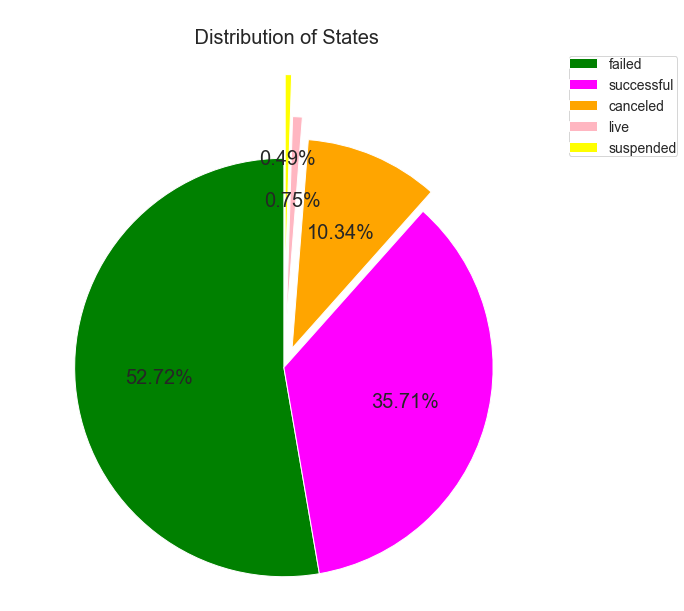

In [27]:
state = df.state.value_counts() 

labels = state.index 
sizes = state.values 
colors = ['Green','Magenta','Orange','LightPink','Yellow', 'SkyBlue'] 
explode = [0,0,.1,.2, .4]

fig1, ax1 = plt.subplots(figsize = (8, 8)) 

patches, texts, autotext = ax1.pie(sizes, colors = colors, startangle=90, autopct='%0.2f%%', explode = explode,
 textprops={'fontsize': 20}) 

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(labels,loc= 2,borderpad=0.05, fontsize = 14, bbox_to_anchor=(1,1)) 
plt.title('\n Distribution of States', fontsize = 20) #title

plt.show()

* We see that most kickstarters fail. 
* It looks like the 2 most common states Failed and Successful can account for most of the data, so we will continue concentrating mostly on them.

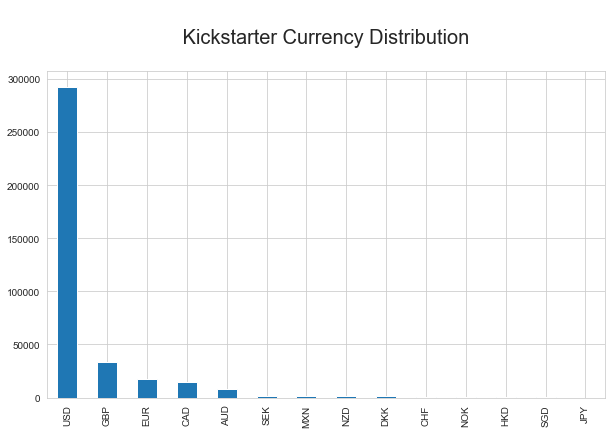

In [28]:
df['currency'].value_counts().plot.bar(figsize=(10,6)) 
plt.title('\n Kickstarter Currency Distribution \n', fontsize = 20) 
plt.show()

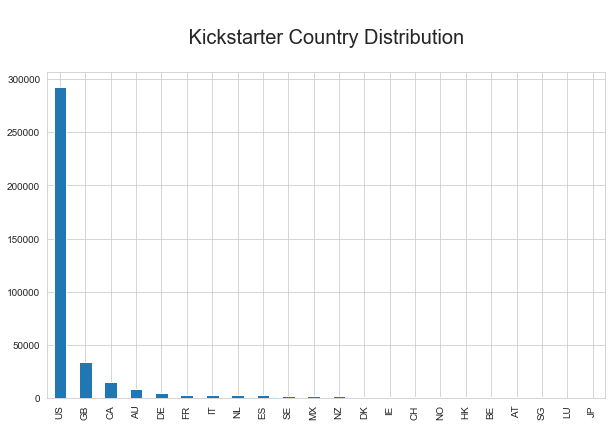

In [29]:
df.country.value_counts().plot.bar(figsize=(10,6)) 
plt.title('\n Kickstarter Country Distribution \n', fontsize = 20) 
plt.show()

* The US definitely has the most Kickstarter campaigns, so it makes sense that the USD also dominates all other currencies in terms of Kickstarters. 
* Since Kickstarter was started in the US, this does not come as a surprise. 

# 2.2. Feature manipulation

In [30]:
df['span_of_project'] = (df['deadline'] - df['launched']).dt.days

* new column based on the length of the project

In [31]:
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year 
df['launch_month']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.month 
df['launch_day']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.dayofweek

* creating column based on launch year
* creating column based on launch month
* creating column based on launch day of week

In [32]:
df.launch_year.describe() #year distribution 

count    374860.000000
mean       2014.240602
std           1.940696
min        1970.000000
25%        2013.000000
50%        2014.000000
75%        2016.000000
max        2018.000000
Name: launch_year, dtype: float64

In [33]:
df.launch_year.nsmallest(10) # let's check out the minimum values here

2842      1970
48147     1970
75397     1970
94579     1970
247913    1970
273779    1970
319002    1970
267       2009
357       2009
643       2009
Name: launch_year, dtype: int64

*  Kickstarter was founded in 2009, so lets get rid of 1970

In [34]:
df = df[df.launch_year >= 1971] 

In [35]:
fail = df.loc[df.state=='failed'] #unsuccessful campaigns
success = df.loc[df.state=='successful'] #successful campaigns
canceled = df.loc[df.state=='canceled'] #canceled campaigns

In [36]:
df['pledge_per_backer_log'] = np.log((df['usd_pledged_real']+1)/(df['backers']+1)) #divide amount pledged by no. of backers & log transform

* I am now going to create a column reflecting the average amount of money a backer donated based on the amount pledged to the campaign.

# 2.3 EDA based on Success of Kickstarters

In [37]:
print('Average Number of Backers of Failed Kickstarters:',fail['backers'].mean()) 
print('Average Number of Backers of Successful Kickstarters:',success['backers'].mean())
print('Average Number of Backers of Canceled Kickstarters:',canceled['backers'].mean())

Average Number of Backers of Failed Kickstarters: 16.431236115398434
Average Number of Backers of Successful Kickstarters: 264.12839650058646
Average Number of Backers of Canceled Kickstarters: 26.006167582772058


* The more backers, the more successful a campaign will obviously be
* It's interesting that the number of backers for successful campaigns about 16 times higher
* That number is probably inflated because of the super successful campaigns go viral

In [38]:
#calculating averages for duration
print('Average Duration (in days) of Failed Kickstarters:',fail['span_of_project'].mean())
print('Average Duration (in days) of Successful Kickstarters:',success['span_of_project'].mean())
print('Average Duration (in days) of Canceled Kickstarters:',canceled['span_of_project'].mean())

Average Duration (in days) of Failed Kickstarters: 35.174585422876255
Average Duration (in days) of Successful Kickstarters: 32.15671903833367
Average Duration (in days) of Canceled Kickstarters: 35.99034863616423


* Most kickstarters stay up for about 5 weeks. 
* This means that after a month, you can make some prediction whether or not your kickstarter will take off. 
* Interesting fact that there is not a huge difference in duration between successful and unsuccessful campaigns.

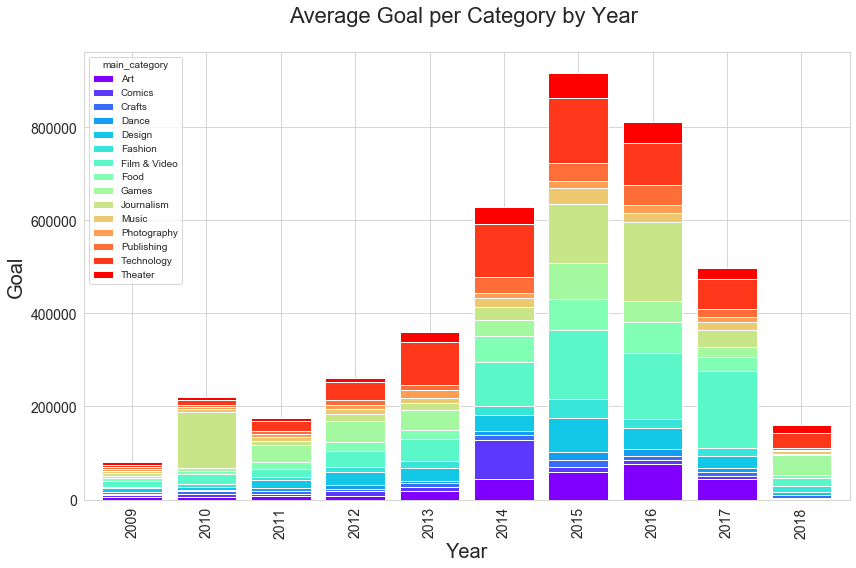

In [41]:
ax1 = plt.subplot(111) 
df.groupby(["launch_year", "main_category"])["usd_goal_real"].mean().unstack().plot(kind='bar', 
                                                        figsize=(12,8), stacked=True, width=0.8, colormap='rainbow', ax=ax1)

plt.title('Average Goal per Category by Year \n', fontsize=22) 
plt.xlabel('Year', fontsize=20)
plt.ylabel('Goal', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout() 
plt.show() 

* It looks like most categories follow the overall trend of increasing their goal as Kickstarter gained more popularity over the years (and then decreasing average goal amount as kickstarter started losing traction starting in 2016).
* Intresting that journalism, which saw a disproportionate amount of growth between 2009 and 2010 and again a few years later between 2014 and 2015.
* Another disproportionate growth amount came with the comic category in 2014. 
* Technology pretty consistently had the most ambitious goals each year. 
* Its surprise that how low the average music goal was each year, given how popular the category is.

In [42]:
import plotly
from plotly import tools
from plotly.offline import init_notebook_mode, iplot #display in notebook
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore') 

#first plot success X year 
trace1 = go.Bar(
            x=success.launch_year.value_counts().index, #referencing our data
            y=success.launch_year.value_counts().values,
            marker = dict(color = 'peachpuff'),
            name = 'Success/Year', 
        )
#second plot success X month
trace2 = go.Bar(
            x=success.launch_month.value_counts().index, #referencing our data
            y=success.launch_month.value_counts().values,
            marker = dict(color = 'orange'),
            name = 'Success/Month'
        )
#second plot success X day
trace3 = go.Bar(
            x=success.launch_day.value_counts().index, #referencing our data
            y=success.launch_day.value_counts().values,
            marker = dict(color = 'orangered'),
            name = 'Success/Day'
        )
#second plot fail X year
trace4 = go.Bar(
            x=fail.launch_year.value_counts().index, #referencing our data
            y=fail.launch_year.value_counts().values,
            marker = dict(color = 'skyblue'),
            name = 'Failed/Year', 
        )
#second plot fail X month
trace5 = go.Bar(
            x=fail.launch_month.value_counts().index, #referencing our data
            y=fail.launch_month.value_counts().values,
            marker = dict(color = 'mediumblue'),
            name = 'Failed/Month', 
        )
#second plot fail X day
trace6 = go.Bar(
            x=fail.launch_day.value_counts().index, #referencing our data
            y=fail.launch_day.value_counts().values,
            marker = dict(color = 'darkblue'),
            name = 'Failed/Day'
        )
fig = tools.make_subplots(rows=2, cols=3, subplot_titles=('Successful X Launch Year', 'Successful X Launch Month', 'Successful X Launch Day',
                                                          'Failed X Launch Year', 'Failed X Launch Month', 'Failed X Launch Day'))
fig.append_trace(trace1, 1, 1) #adding each to graphic
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig['layout'].update(height=400, width=1100, title='Time of Launch X Success of Kickstarters') #dimensions and title
iplot(fig)

In [43]:
 #first plot success X sub category  
trace1 = go.Bar(
            x=success.category.value_counts().index,
            y=success.category.value_counts().values,
            name = 'Successful', 
        )

#second plot fail X sub category
trace2 = go.Bar(
            x=fail.category.value_counts().index,
            y=fail.category.value_counts().values,
            name = 'Failed', 
        )

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Successful X Sub Category', 'Failed X Sub Category'))
fig.append_trace(trace1, 1, 1) #adding both plots to graphic
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=400, width=1100, title='Top Categories for Successful and Failed Kickstarters') #dimensions and title

iplot(fig)

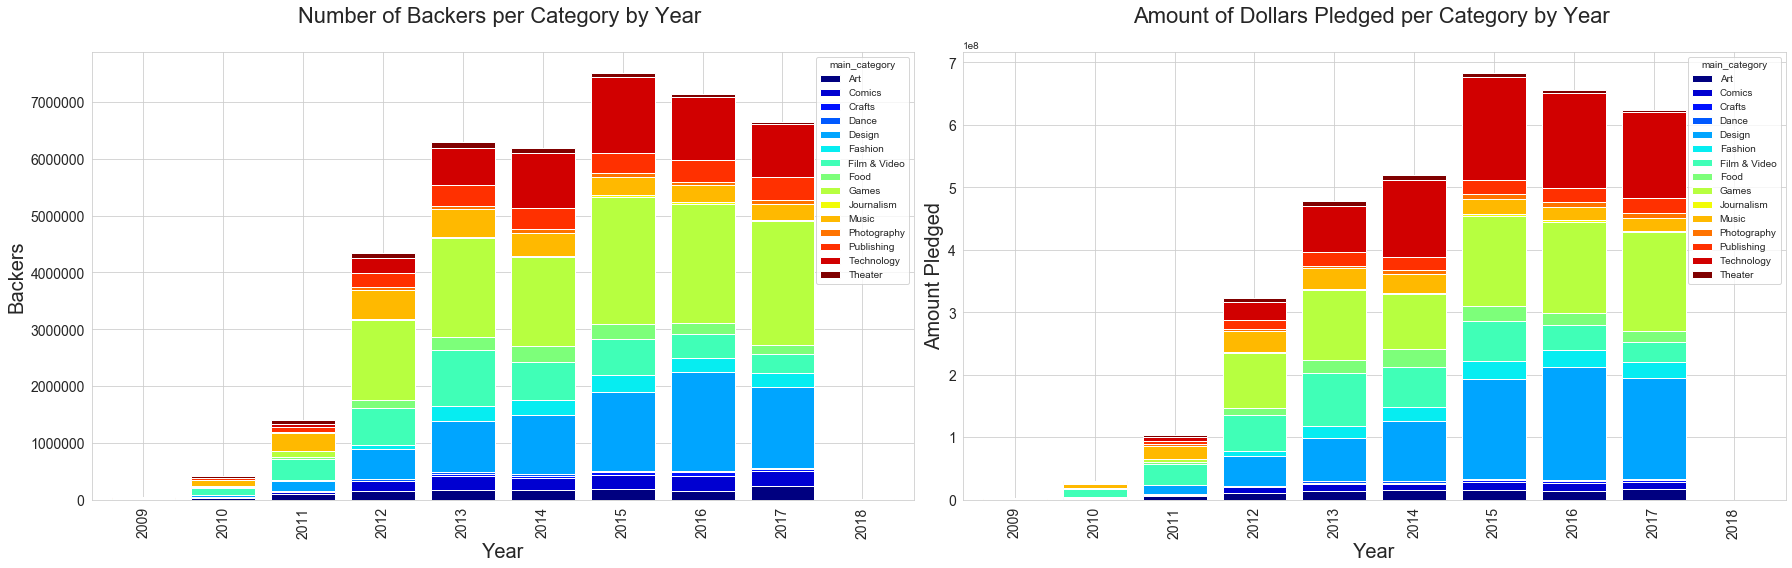

In [44]:
ax1 = plt.subplot(121) #creating first subplot
df.groupby(["launch_year", "main_category"])["backers"].sum().unstack().plot(kind='bar', 
                                                        figsize=(25,8), stacked=True, width=0.8, colormap='jet', ax=ax1)

plt.title('Number of Backers per Category by Year \n', fontsize=22)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Backers', fontsize=20)
plt.xticks(fontsize=14) #x and y ticks
plt.yticks(fontsize=14)

ax2 = plt.subplot(122) #creating second subplot 
df.groupby(["launch_year", "main_category"])["usd_pledged_real"].sum().unstack().plot(kind='bar', 
                                                        figsize=(25,8), stacked=True, width=0.8, colormap='jet', ax=ax2)

plt.title('Amount of Dollars Pledged per Category by Year \n', fontsize=22) 
plt.xlabel('Year', fontsize=20)
plt.ylabel('Amount Pledged', fontsize=20)
plt.xticks(fontsize=14) #x and y ticks
plt.yticks(fontsize=14)

plt.tight_layout() #keeps labels from overlapping
plt.show() #show subplots

,ID,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_year,launch_month,launch_day,pledge_per_backer_log
0,1000002330,Poetry,Publishing,GBP,2015-10-09,2015-08-11,failed,0,GB,0.0,1533.95,59,2015,8,1,0.000000
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02,failed,15,US,2421.0,30000.00,60,2017,9,5,5.019760
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12,failed,3,US,220.0,45000.00,45,2013,1,5,4.011868
3,1000007540,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,30,2012,3,5,0.000000
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,2015-07-04,canceled,14,US,1283.0,19500.00,56,2015,7,5,4.449685


#3. FEATURE ENGINEERING

In [55]:
df.head(5)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_year,launch_month,launch_day,pledge_per_backer_log
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11,failed,0,GB,0.0,1533.95,59,2015,8,1,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02,failed,15,US,2421.0,30000.00,60,2017,9,5,5.019760
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12,failed,3,US,220.0,45000.00,45,2013,1,5,4.011868
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17,failed,1,US,1.0,5000.00,30,2012,3,5,0.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04,canceled,14,US,1283.0,19500.00,56,2015,7,5,4.449685


In [70]:
df.drop('name', axis=1, inplace=True) #we don't need name




KeyError: "['name'] not found in axis"

In [72]:
df.drop('category', axis=1, inplace=True) #we don't need category - too much data

In [73]:
df.drop('currency', axis=1, inplace=True) #we don't need currency - too much data

In [75]:
df.drop('deadline', axis=1, inplace=True) #we don't need deadline - we converted it
df.drop('launched', axis=1, inplace=True) #we don't need lauched - we converted it

In [90]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [93]:
failed_df = df.loc[df.state=='failed']

,ID,main_category,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_year,launch_month,launch_day,pledge_per_backer_log
0,1000002330,Publishing,failed,0,GB,0.0,1533.95,59,2015,8,1,0.000000
1,1000003930,Film & Video,failed,15,US,2421.0,30000.00,60,2017,9,5,5.019760
2,1000004038,Film & Video,failed,3,US,220.0,45000.00,45,2013,1,5,4.011868
3,1000007540,Music,failed,1,US,1.0,5000.00,30,2012,3,5,0.000000
7,1000030581,Food,failed,40,US,453.0,25000.00,45,2016,2,0,2.404525
...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,Food,failed,4,US,154.0,6500.00,30,2017,3,0,3.433987
378657,999977640,Film & Video,failed,5,US,155.0,1500.00,27,2011,6,2,3.258097
378658,999986353,Film & Video,failed,1,US,20.0,15000.00,46,2010,7,3,2.351375
378659,999987933,Technology,failed,6,US,200.0,15000.00,31,2016,1,2,3.357395


In [95]:
successful_df = df.loc[df.state=='successful']

,ID,main_category,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_year,launch_month,launch_day,pledge_per_backer_log
5,1000014025,Food,successful,224,US,52375.00,50000.00,35,2016,2,4,5.450103
6,1000023410,Food,successful,16,US,1205.00,1000.00,20,2014,12,0,4.261851
11,100005484,Music,successful,100,US,12700.00,12500.00,30,2013,3,5,4.834315
14,1000057089,Games,successful,761,GB,121857.33,6469.73,28,2017,4,2,5.074668
18,1000070642,Music,successful,7,US,250.00,250.00,15,2012,8,3,3.446011
...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,Games,successful,35,FR,1452.47,1165.70,27,2017,10,2,3.698190
378644,999934908,Design,successful,120,US,6169.00,3500.00,22,2015,11,0,3.931664
378646,999943841,Publishing,successful,31,US,1732.02,950.00,43,2013,10,4,3.991885
378651,999969812,Music,successful,78,CA,4983.69,4529.81,30,2014,2,3,4.144679


In [102]:
df[(df.loc[df.state=='successful'])  (df.loc[df.state=='failed'])]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#PREPARING 2 DATASETS: model_df includes label encoding and new_df includes get dummies

In [108]:
model_df = df[(df.state=='successful') | (df.state=='failed')]
model_df

,ID,main_category,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_year,launch_month,launch_day,pledge_per_backer_log
0,1000002330,Publishing,failed,0,GB,0.0,1533.95,59,2015,8,1,0.000000
1,1000003930,Film & Video,failed,15,US,2421.0,30000.00,60,2017,9,5,5.019760
2,1000004038,Film & Video,failed,3,US,220.0,45000.00,45,2013,1,5,4.011868
3,1000007540,Music,failed,1,US,1.0,5000.00,30,2012,3,5,0.000000
5,1000014025,Food,successful,224,US,52375.0,50000.00,35,2016,2,4,5.450103
...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,Food,failed,4,US,154.0,6500.00,30,2017,3,0,3.433987
378657,999977640,Film & Video,failed,5,US,155.0,1500.00,27,2011,6,2,3.258097
378658,999986353,Film & Video,failed,1,US,20.0,15000.00,46,2010,7,3,2.351375
378659,999987933,Technology,failed,6,US,200.0,15000.00,31,2016,1,2,3.357395


In [109]:
model_df.drop('launch_year', axis=1, inplace=True) #we don't need year - too much data

In [110]:
model_df

,ID,main_category,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_month,launch_day,pledge_per_backer_log
0,1000002330,Publishing,failed,0,GB,0.0,1533.95,59,8,1,0.000000
1,1000003930,Film & Video,failed,15,US,2421.0,30000.00,60,9,5,5.019760
2,1000004038,Film & Video,failed,3,US,220.0,45000.00,45,1,5,4.011868
3,1000007540,Music,failed,1,US,1.0,5000.00,30,3,5,0.000000
5,1000014025,Food,successful,224,US,52375.0,50000.00,35,2,4,5.450103
...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,Food,failed,4,US,154.0,6500.00,30,3,0,3.433987
378657,999977640,Film & Video,failed,5,US,155.0,1500.00,27,6,2,3.258097
378658,999986353,Film & Video,failed,1,US,20.0,15000.00,46,7,3,2.351375
378659,999987933,Technology,failed,6,US,200.0,15000.00,31,1,2,3.357395


In [123]:
model_df['backers'].sum()

38600843

In [124]:
#converting 'successful' state to 1 and failed to 0
model_df['state'] = (model_df['state'] =='successful').astype(int)
print(model_df.shape)

(331462, 11)


In [237]:
model_df.drop('ID', axis=1, inplace=True) #we don't need ID

In [239]:
n_df.drop('ID', axis=1, inplace=True) #we don't need ID

In [238]:
model_df

,state,usd_goal_real,span_of_project,launch_month,launch_day,country_lbl,main_category_lbl
0,0,0.000009,0.637363,8,1,9,12
1,0,0.000180,0.648352,9,5,21,6
2,0,0.000270,0.483516,1,5,21,6
3,0,0.000030,0.318681,3,5,21,10
5,1,0.000301,0.373626,2,4,21,7
...,...,...,...,...,...,...,...
378654,0,0.000039,0.318681,3,0,21,7
378657,0,0.000009,0.285714,6,2,21,6
378658,0,0.000090,0.494505,7,3,21,6
378659,0,0.000090,0.329670,1,2,21,13


In [220]:
n_df =df[(df.state=='successful') | (df.state=='failed')]
n_df

,ID,main_category,state,backers,country,usd_pledged_real,usd_goal_real,span_of_project,launch_year,launch_month,launch_day,pledge_per_backer_log
0,1000002330,Publishing,failed,0,GB,0.0,1533.95,59,2015,8,1,0.000000
1,1000003930,Film & Video,failed,15,US,2421.0,30000.00,60,2017,9,5,5.019760
2,1000004038,Film & Video,failed,3,US,220.0,45000.00,45,2013,1,5,4.011868
3,1000007540,Music,failed,1,US,1.0,5000.00,30,2012,3,5,0.000000
5,1000014025,Food,successful,224,US,52375.0,50000.00,35,2016,2,4,5.450103
...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,Food,failed,4,US,154.0,6500.00,30,2017,3,0,3.433987
378657,999977640,Film & Video,failed,5,US,155.0,1500.00,27,2011,6,2,3.258097
378658,999986353,Film & Video,failed,1,US,20.0,15000.00,46,2010,7,3,2.351375
378659,999987933,Technology,failed,6,US,200.0,15000.00,31,2016,1,2,3.357395


In [221]:
n_df = pd.get_dummies(n_df, columns=['main_category', 'country'],\
                          prefix=['main_cat', 'country'], drop_first=True)

In [222]:
to_drop = ['usd_pledged_real', 'backers', 'pledge_per_backer_log', 'launch_year' ]
n_df.drop(to_drop,  axis=1, inplace=True)

In [240]:
n_df

,state,usd_goal_real,span_of_project,launch_month,launch_day,main_cat_Comics,main_cat_Crafts,main_cat_Dance,main_cat_Design,main_cat_Fashion,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0.000009,0.637363,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000180,0.648352,9,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000270,0.483516,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.000030,0.318681,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0.000301,0.373626,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,0,0.000039,0.318681,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378657,0,0.000009,0.285714,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378658,0,0.000090,0.494505,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378659,0,0.000090,0.329670,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [224]:
num_cols = ['usd_goal_real', 'span_of_project']

for col in num_cols:
    n_df[col] = (minmax_scale(new_df[col], feature_range=(0,1)))

In [225]:
#converting 'successful' state to 1 and failed to 0
targ_dict = {'failed': 0,
             'successful': 1 
            }

n_df['state'] = n_df['state'].map(targ_dict)


n_df

In [245]:
n_df

,state,usd_goal_real,span_of_project,launch_month,launch_day,main_cat_Comics,main_cat_Crafts,main_cat_Dance,main_cat_Design,main_cat_Fashion,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0.000009,0.637363,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000180,0.648352,9,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000270,0.483516,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.000030,0.318681,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0.000301,0.373626,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,0,0.000039,0.318681,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378657,0,0.000009,0.285714,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378658,0,0.000090,0.494505,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378659,0,0.000090,0.329670,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [162]:
#transforming countries to numeric 

le = LabelEncoder()
le.fit(model_df['country'])
model_df['country_lbl'] = le.transform(model_df['country'])

In [164]:
#transforming main category to numeric 
le.fit(model_df['main_category'])
model_df['main_category_lbl'] = le.transform(model_df['main_category'])

In [170]:
to_drop = ['main_category', 'country']
n_model_df = model_df.drop(to_drop,  axis=1, inplace=True)

In [175]:
to_drop = ['usd_pledged_real', 'backers', 'pledge_per_backer_log' ]
n_model_df = model_df.drop(to_drop,  axis=1, inplace=True)

In [244]:
model_df

,state,usd_goal_real,span_of_project,launch_month,launch_day,country_lbl,main_category_lbl
0,0,0.000009,0.637363,8,1,9,12
1,0,0.000180,0.648352,9,5,21,6
2,0,0.000270,0.483516,1,5,21,6
3,0,0.000030,0.318681,3,5,21,10
5,1,0.000301,0.373626,2,4,21,7
...,...,...,...,...,...,...,...
378654,0,0.000039,0.318681,3,0,21,7
378657,0,0.000009,0.285714,6,2,21,6
378658,0,0.000090,0.494505,7,3,21,6
378659,0,0.000090,0.329670,1,2,21,13


In [183]:
num_cols = ['usd_goal_real', 'span_of_project']

for col in num_cols:
    model_df[col] = (minmax_scale(model_df[col], feature_range=(0,1)))

In [243]:
model_df

,state,usd_goal_real,span_of_project,launch_month,launch_day,country_lbl,main_category_lbl
0,0,0.000009,0.637363,8,1,9,12
1,0,0.000180,0.648352,9,5,21,6
2,0,0.000270,0.483516,1,5,21,6
3,0,0.000030,0.318681,3,5,21,10
5,1,0.000301,0.373626,2,4,21,7
...,...,...,...,...,...,...,...
378654,0,0.000039,0.318681,3,0,21,7
378657,0,0.000009,0.285714,6,2,21,6
378658,0,0.000090,0.494505,7,3,21,6
378659,0,0.000090,0.329670,1,2,21,13


#We have two dataframes: model_df and n_df. Let's test both

In [242]:
n_df.head(5)

,state,usd_goal_real,span_of_project,launch_month,launch_day,main_cat_Comics,main_cat_Crafts,main_cat_Dance,main_cat_Design,main_cat_Fashion,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0.000009,0.637363,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000180,0.648352,9,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000270,0.483516,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.000030,0.318681,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0.000301,0.373626,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [241]:
model_df.head(5)

,state,usd_goal_real,span_of_project,launch_month,launch_day,country_lbl,main_category_lbl
0,0,0.000009,0.637363,8,1,9,12
1,0,0.000180,0.648352,9,5,21,6
2,0,0.000270,0.483516,1,5,21,6
3,0,0.000030,0.318681,3,5,21,10
5,1,0.000301,0.373626,2,4,21,7


#Let's split our data in train, validation and test sets

In [247]:
#for n_df

X_train, X_test, y_train, y_test = train_test_split(n_df.drop('state', axis=1), n_df['state'], 
                                                    test_size=.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.10, random_state=42)

In [251]:
##for model_df

X_train, X_test, y_train, y_test = train_test_split(model_df.drop('state', axis=1), model_df['state'], 
                                                    test_size=.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.10, random_state=42)

In [252]:
print(f'Shape train: {X_train.shape}')
print(f'Shape valid: {X_val.shape}')
print(f'Shape test: {X_test.shape}')

Shape train: (238652, 6)
Shape valid: (26517, 6)
Shape test: (66293, 6)


In [249]:
y_train.unique()

array([0, 1], dtype=int64)

LogReg: 0.395314 (+/- 0.004137)
XGBClassifier: 0.485192 (+/- 0.003019)
DecisionTreeClassifier: 0.456145 (+/- 0.004449)
RandomForestClassifier: 0.482030 (+/- 0.002599)
GradientBoostingClassifier: 0.455212 (+/- 0.004700)
RidgeClassifier: 0.302027 (+/- 0.002221)
BaggingRidgeClassifier: 0.447074 (+/- 0.003035)
ExtraTreesClassifier: 0.431255 (+/- 0.002244)


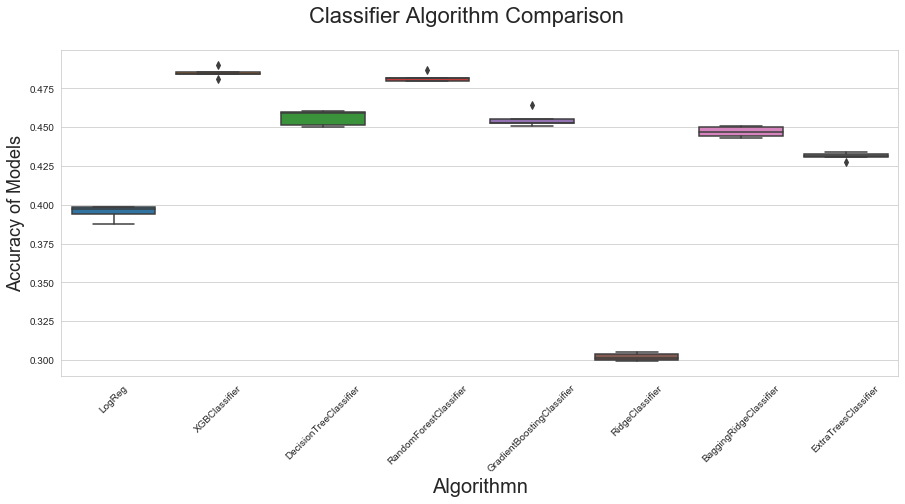

In [250]:
#n_df

clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'recall' #accuracy
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

LogReg: 0.148541 (+/- 0.006582)
XGBClassifier: 0.479677 (+/- 0.003147)
DecisionTreeClassifier: 0.454217 (+/- 0.003075)
RandomForestClassifier: 0.478858 (+/- 0.001689)
GradientBoostingClassifier: 0.446048 (+/- 0.006137)
RidgeClassifier: 0.057223 (+/- 0.001254)
BaggingRidgeClassifier: 0.444742 (+/- 0.001899)
ExtraTreesClassifier: 0.427554 (+/- 0.003313)


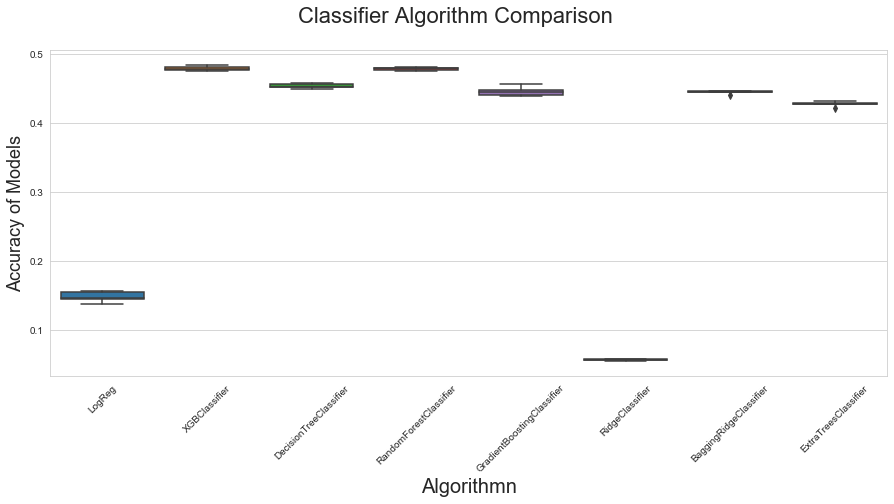

In [253]:
#model_df

clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'recall'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()